In [4]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [5]:
IMAGE_SIZE = 256
Batch_size = 32
CHANNELS = 3
size = 256


In [6]:
import os

In [7]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=Batch_size
)

Found 708 files belonging to 3 classes.


In [8]:
data_classes = data.class_names

In [9]:
data_classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
data_len = len(data)

In [11]:
data_len

23

In [14]:
for image_batch,label_batch in data.take(1):
    print(image_batch.shape)

(32, 256, 256, 3)


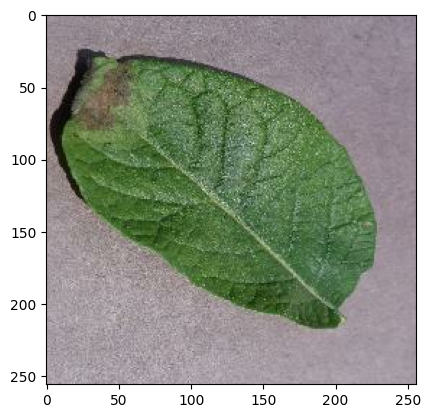

In [27]:
for image_batch,label_batch in data.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))


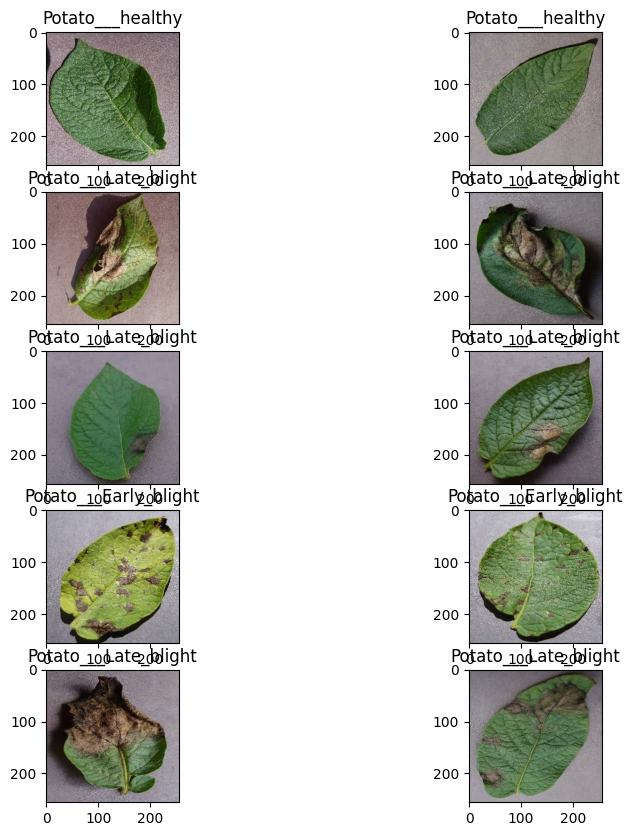

In [29]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in data.take(1):
    for i in range(10):
        ax = plt.subplot(5,2,i+1)
        plt.title(data_classes[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        


In [30]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    
    train_size = int(train_split*ds_size)

    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.take(val_size)

    test_ds = ds.skip(train_size + val_size)

    return train_ds,val_ds,test_ds
train_ds,val_ds,test_ds = get_dataset_partitions_tf(data)

In [31]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [32]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(size, size),
    layers.Rescaling(1./255)
])

In [33]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [34]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [37]:
# Define input shape and classes
input_shape = (Batch_size, size, size, 3)
n_classes = 3

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Softmax

model = models.Sequential([

    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')

])



In [42]:
model.build(input_shape)

In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 60, 60, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 30, 30, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (32, 28, 28, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 14, 14, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 25088)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,846,723 (7.04 MB)

 Trainable params: 1,846,723 (7.04 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [47]:
final_model = model.fit(
    train_ds,
    batch_size=Batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=10
)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.4025 - loss: 1.1242 - val_accuracy: 0.5000 - val_loss: 1.0109
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5012 - loss: 1.0039 - val_accuracy: 0.4531 - val_loss: 0.9308
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6713 - loss: 0.6548 - val_accuracy: 0.8594 - val_loss: 0.4265
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7518 - loss: 0.5477 - val_accuracy: 0.5781 - val_loss: 0.9957
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8553 - loss: 0.3780 - val_accuracy: 0.9688 - val_loss: 0.2446
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1501s 88s/step - accuracy: 0.8823 - loss: 0.2948 - val_accuracy: 0.7188 - val_loss: 0.6326
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8488 - loss: 0.3462 - val_accuracy: 0.8281 - val_loss: 0.3934
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9070 - loss: 0.2515 - val_accuracy: 0.7812 - val_lo

In [48]:
final_model.history['accuracy']

[0.4397810101509094,
 0.514598548412323,
 0.6934306621551514,
 0.7846715450286865,
 0.8667883276939392,
 0.8576642274856567,
 0.8667883276939392,
 0.8850364685058594,
 0.8740875720977783,
 0.8868613243103027]

In [49]:
acc = final_model.history['accuracy']
val_acc = final_model.history['val_accuracy']

loss = final_model.history['loss']
val_loss = final_model.history['val_loss']

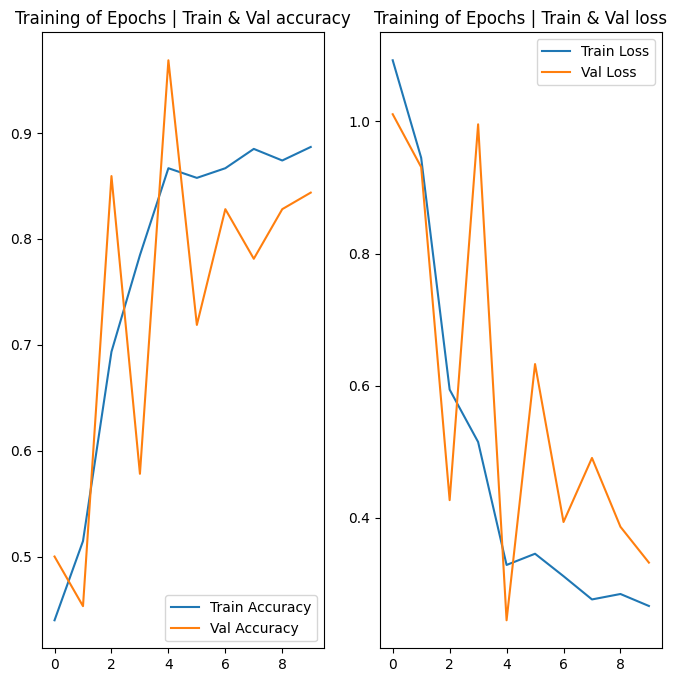

In [52]:
epochs = 10
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Train Accuracy')
plt.plot(range(epochs), val_acc, label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Training of Epochs | Train & Val accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Train Loss')
plt.plot(range(epochs), val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Training of Epochs | Train & Val loss')
plt.show()

Image to predict: 
The actual label of the img: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
The predicted label: Potato___Late_blight


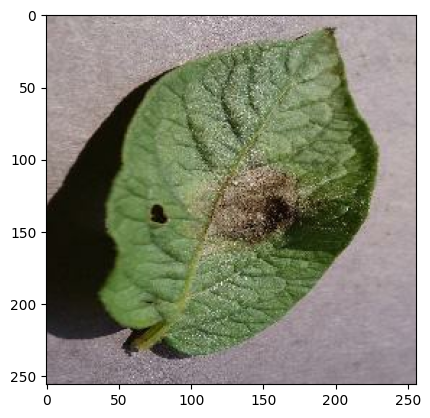

In [58]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):

    first_img = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()


    print("Image to predict: ")
    plt.imshow(first_img)
    print("The actual label of the img:",data_classes[first_label])
    prediction = model.predict(image_batch)
    print("The predicted label:",data_classes[np.argmax(prediction[0])])
